<a href="https://colab.research.google.com/github/Summertree-8/machine_learning/blob/main/ML_supervised_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [45]:
columns_name = dataset.feature_names

In [5]:
x = dataset.data #input data

In [7]:
t = dataset.target #target data

In [10]:
np.unique(t) #何種類あるか、ユニークなものはどんなものがあるか

array([0, 1, 2])

In [13]:
x.shape #size

(150, 4)

In [16]:
t.shape

(150,)

In [14]:
#data set 分割

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,t_train, t_test = train_test_split(x,t,test_size = 0.3, random_state=0)

In [19]:
x_test.shape 

(45, 4)

In [ ]:
#分類の決定木

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model = DecisionTreeClassifier(random_state=0)

In [23]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [25]:
model.fit(x_train, t_train) #fin learning

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [27]:
#検証

In [80]:
print(f'train score: {model.score(x_train, t_train)}') #.score->正解率
print(f'test score: {model.score(x_test, t_test)}')

train score: 0.9714285714285714
test score: 0.9777777777777777


In [ ]:
#クロスエントロピー　正解データと予測データの差
#推論

In [34]:
model.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [35]:
#決定木→なるべく交じりがないように分類、木の深さが深すぎると過学習
#解釈が容易、理由の説明しやすい、必要な前処理が少ない
#過学習で汎用性低め→ハイパーパラメータで抑えるのが大事(max_depth、min_samples_split分岐数)

In [ ]:
#木構造の書き出し

In [36]:
import graphviz
from sklearn.tree import export_graphviz

In [38]:
dot_data = export_graphviz(model)

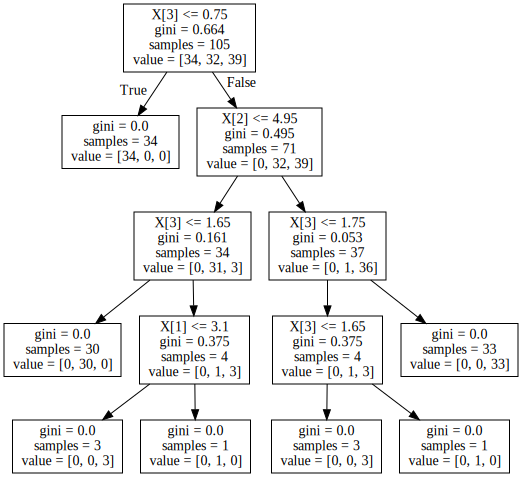

In [42]:
graph_tree = graphviz.Source(dot_data) #train data
graph_tree

In [ ]:
#どの入力変数の影響が大きいかわかる

In [54]:
feature_importance = model.feature_importances_
feature_importance
#3番目のが一番影響している　上の図のX[3]　

array([0.        , 0.02150464, 0.39766951, 0.58082584])

In [50]:
y = columns_name
width = feature_importance

<BarContainer object of 4 artists>

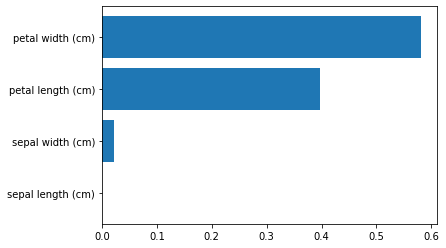

In [52]:
plt.barh(y=y,width=width) #横棒グラフを書く　

In [ ]:
#複数のモデルをもとに1つのモデルにするもの　アンサンブル学習

In [55]:
#サポートベクトルマシンSVM　与えられたデータを線形分離　マージン(境界線に最も近い点の距離)最大
#カーネルトリック　大きめの次元にして分離→2次元にもどすことで境界できる

In [56]:
from sklearn.svm import SVC

In [58]:
model = SVC() #インスタンス化

In [59]:
model.fit(x_train, t_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
#modelの検証
print(f'train score: {model.score(x_train, t_train)}') #.score->正解率
print(f'test score: {model.score(x_test, t_test)}')

train score: 0.9714285714285714
test score: 0.9777777777777777


In [ ]:
#標準化

In [61]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler() #インスタンス化

In [68]:
scaler.fit(x_train) #標準化

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
#実際のデータに対して標準化
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [69]:
x_train

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2

In [73]:
x_train.mean() #平均

3.4985714285714287

In [72]:
x_train_std.mean()  #ほぼ0になる

3.6795963101862333e-16

In [74]:
round(x_train_std.mean())

0

In [75]:
round(x_train_std.std()) #標準偏差は１になる

1

In [ ]:
#標準化したデータをもとにもう一度実装

In [76]:
model_std = SVC()

In [77]:
model_std.fit(x_train_std, t_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
#modelの検証
print(f'train score: {model.score(x_train, t_train)}') #.score->正解率
print(f'test score: {model.score(x_test, t_test)}')
print('====================')
print(f'train score: {model_std.score(x_train_std, t_train)}') #.score->正解率
print(f'test score: {model_std.score(x_test_std, t_test)}')
#今回の標準化では変化がなかったが必要！

train score: 0.9714285714285714
test score: 0.9777777777777777
train score: 0.9714285714285714
test score: 0.9777777777777777


In [87]:
model_std = SVC(C=1000.0, gamma=0.01)
#model_std = SVC(C=5.0, gamma=0.1) #C:誤った予測に対するペナルティ、gamma:modelの複雑さを決定　大きいと過学習起こしやすくなる
#ハイパーパラメータを変えることによって値が変わることの実験

In [88]:
model_std.fit(x_train_std, t_train)

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
#modelの検証
print(f'train score: {model.score(x_train, t_train)}') #.score->正解率
print(f'test score: {model.score(x_test, t_test)}')
print('====================')
print(f'train score: {model_std.score(x_train_std, t_train)}') #.score->正解率
print(f'test score: {model_std.score(x_test_std, t_test)}')

train score: 0.9714285714285714
test score: 0.9777777777777777
train score: 0.9809523809523809
test score: 0.9777777777777777


分類の評価方法　試用しているものによってどの指標を使うのか調整  
混同行列：関係性をとらえる  
Accuracy 正解率 斜め  
Precision 適合率 たて  
Recall 再現率 横  
F1 score  precisionとrecallのバランスをとる
